# ISYE 6740 Project - NBA Players Career Trajectory Prediction
### Author: Daniel Jiang, Nafiz Haider

The National Basketball Association (NBA) is the premier professional basketball association in the world. This sport has produced numerous stars and all time greats. There have been even more players that have excelled in their first, or rookie, NBA seasons. However, we have seen that a more accurate prediction of a player’s trajectory is from their second season.

In [1]:
"""
Python Program that:
1. Uses career data of players from 1990-2010, PCA transforms to 5 dimensions, and 
performs k means and k medoids clustering into six groups

2. Uses second year stats of players from 1990-2010 and finds clusters averages

3. Place cluster assignments for current second year players. Use cluster averages 
of 1990-2010 players to measure euclidean distances to second year players. Place
second year players in closest cluster

4. Visualize data and results through graphs, tables, and spreadsheets 
"""
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import requests
import re
import csv
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler


In [2]:
"""
Function that creates pyplot tables of data
"""
def table_creator(title, table_data):
	fig = plt.figure()
	ax = fig.add_subplot(1,1,1)
	table = ax.table(cellText=table_data, loc='center')
	table.auto_set_font_size(False)
	table.set_fontsize(8)
	ax.axis('off')
	plt.title(title)
	plt.show()


In [3]:
"""
Function used to gather total all star and all nba selectinos for historical players
"""
def extract_bling_info(soup):
	""" number of All-star and All-NBA selections can be found in the "bling" element """
		
	ALL_STAR, ALL_NBA = 0, 0
	bling = soup.find(id="bling")
	if bling:
		bling = bling.find_all('li')
		for b in bling:
			text = b.a.text
			if text.find("All Star") != -1:
				if text.find("x") != -1:
					ALL_STAR = int(text.split("x")[0])
				else:
					ALL_STAR = 1
			elif text.find("All-NBA") != -1:
				if text.find("x") != -1:
					ALL_NBA = int(text.split("x")[0])
				else:
					ALL_NBA = 1
	return ALL_STAR, ALL_NBA

In [4]:
"""
Function used to scrape and create csv file for career stats of historical players
"""
def scrape_player_career(player_list):
	"""
	given player ID, return player's career averages as pandas data frame
	"""

	out_path = 'second_yrs_career_1990-2010.csv'
	csv_file = open(out_path, 'w')
	csv_writer = csv.writer(csv_file)
	features = ['Cluster 0','Cluster 1','Cluster 2','Cluster 2','Cluster 2','Cluster 2','3P','3PA','FT','FTA','ORB','DRB','TRB',
					'AST','STL','BLK','TOV','PF','PTS','FG%','2P%','3P%','eFG%','FT%','ALL_STAR','ALL_NBA']
		
	csv_writer.writerow(features)
	row = [GS_PCT,MP,FG,FGA,TWO_P,TWO_PA,THREE_P,THREE_PA,FT,FTA,ORB,DRB,TRB,
					AST,STL,BLK,TOV,PF,PTS,FG_PCT,TWO_PCT,THREE_PCT,EFG_PCT,FT_PCT,ALL_STAR,ALL_NBA]
	csv_writer.writerow(row)

	for i in range(len(player_list)):
		player_id = player_list.iloc[i]

		URL = 'https://www.basketball-reference.com/players/{}/{}.html'.format(player_id[0], player_id)
		r = requests.get(URL)
		soup = BeautifulSoup(r.text, "html5lib")
		# extract desired columns from per-game table, career row 
		# note each has a try except due to missing data for some players
		# example: if player has never attempted a three point shot
		career_per = soup.find(id="per_game").tfoot.contents[0]
		try:
			G = career_per.contents[5].contents[0]
		except:
			G = 0
		try:
			GS = career_per.contents[6].contents[0]
		except:
			GS = 0            
		if int(G) == 0:
			GS_PCT = 0
		else:
			GS_PCT = round(int(GS)/int(G), 2)
		try:
			MP = career_per.contents[7].contents[0]
		except:
			MP = 0
		try:
			FG = career_per.contents[8].contents[0]
		except:
			FG = 0
		try:
			FGA = career_per.contents[9].contents[0]
		except:
			FGA = 0
		try:
			FG_PCT = career_per.contents[10].contents[0]
		except:
			FG_PCT = 0
		try:
			THREE_P = career_per.contents[11].contents[0]
		except:
			THREE_P = 0
		try:
			THREE_PA = career_per.contents[12].contents[0]
		except:
			THREE_PA = 0
		try:
			THREE_PCT = career_per.contents[13].contents[0]
		except:
			THREE_PCT = 0
		try:
			TWO_P = career_per.contents[14].contents[0]
		except:
			TWO_P = 0
		try:
			TWO_PA = career_per.contents[15].contents[0]
		except:
			TWO_PA = 0
		try:
			TWO_PCT = career_per.contents[16].contents[0]
		except:
			TWO_PCT = 0
		try:
			EFG_PCT = career_per.contents[17].contents[0]
		except:
			EFG_PCT = 0
		try:
			FT = career_per.contents[18].contents[0]
		except:
			FT = 0
		try:
			FTA = career_per.contents[19].contents[0]
		except:
			FTA = 0
		try:
			FT_PCT = career_per.contents[20].contents[0]
		except:
			FT_PCT = 0
		try:
			ORB = career_per.contents[21].contents[0]
		except:
			ORB = 0
		try:
			DRB = career_per.contents[22].contents[0]
		except:
			DRB = 0
		try:
			TRB = career_per.contents[23].contents[0]
		except:
			TRB = 0
		try:
			AST = career_per.contents[24].contents[0]
		except:
			AST = 0
		try:
			STL = career_per.contents[25].contents[0]
		except:
			STL = 0
		try:
			BLK = career_per.contents[26].contents[0]
		except:
			BLK = 0
		try:
			TOV = career_per.contents[27].contents[0]
		except:
			TOV = 0
		try:
			PF = career_per.contents[28].contents[0]
		except:
			PF = 0
		try:
			PTS = career_per.contents[29].contents[0]
		except:
			PTS = 0


		ALL_STAR, ALL_NBA = extract_bling_info(soup)    
		row = [GS_PCT,MP,FG,FGA,TWO_P,TWO_PA,THREE_P,THREE_PA,FT,FTA,ORB,DRB,TRB,
					AST,STL,BLK,TOV,PF,PTS,FG_PCT,TWO_PCT,THREE_PCT,EFG_PCT,FT_PCT,ALL_STAR,ALL_NBA]
		csv_writer.writerow(row)

In [5]:
"""
init function. second_yrs_current_season contains current player stats, second_yrs_1990_2010_season
contain stats of historical second year players, and second_yrs_1990_2010_career contains historical
career data.
Career data was initially scraped with scrape_player_career() function

Career data is scaled and normalized, goes through PCA transform, and then clustered and visualized
in historic_players_projections.

current_players_projections takes historical data clusters and clusters current players along with 
visualization and spreadsheets creation of players per cluster.
"""
# all current (2019-2020) second-year players
# these are the players we are predicting the future of
second_yrs_current_season_pd = pd.read_csv('data/second_yrs_season_2019-2020.csv', header=1)
second_yrs_current_season_players_list = second_yrs_current_season_pd.iloc[:,1].to_numpy()
second_yrs_current_season = second_yrs_current_season_pd.to_numpy()[0:,8:32].astype(float)
second_yrs_current_season = np.nan_to_num(second_yrs_current_season)

# list of players and their second-year stats for those who played 1990-2010
second_yrs_1990_2010_season_pd = pd.read_csv('data/second_yrs_season_1990-2010.csv', header=1)
second_yrs_1990_2010_season = second_yrs_1990_2010_season_pd.to_numpy()[0:,8:32].astype(float)
second_yrs_1990_2010_season = np.nan_to_num(second_yrs_1990_2010_season)

# extract player_list from second_yrs_1990_2010_season
player_list = second_yrs_1990_2010_season_pd.iloc[:,1]
player_list = player_list.str.split('\\').str[1]

#
#
# run in order to generate second_yrs_career_1990-2010.csv file
# note this is already generated
#scrape_player_career(player_list)
#
#

# second_yrs_career_1990-2010.csv is the career stats for 
# players who played second season between 1990 and 2010
second_yrs_1990_2010_career_pd = pd.read_csv('data/second_yrs_career_1990-2010.csv')
second_yrs_1990_2010_career = second_yrs_1990_2010_career_pd.to_numpy()[0:,:24].astype(float)
second_yrs_1990_2010_career = np.nan_to_num(second_yrs_1990_2010_career)

# normalize data before performing PCA
scaler = MinMaxScaler(feature_range=(0,1))
second_yrs_1990_2010_career_normalized = scaler.fit_transform(second_yrs_1990_2010_career)

# PCA Dimension reduction of career data
pca = PCA(n_components=5)
pca.fit(second_yrs_1990_2010_career_normalized)
#variance = pca.explained_variance_ratio_
reduced_representation_career_data = pca.transform(second_yrs_1990_2010_career_normalized)

KMEANS CLUSTERING Historic Players


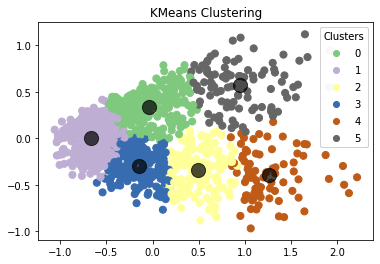

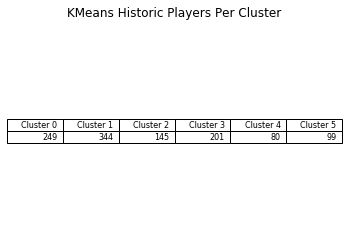

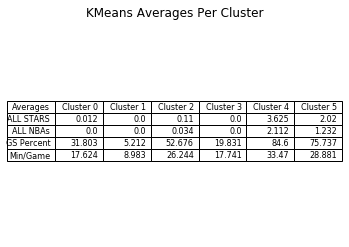

KMEDOIDS CLUSTERING Historic Players


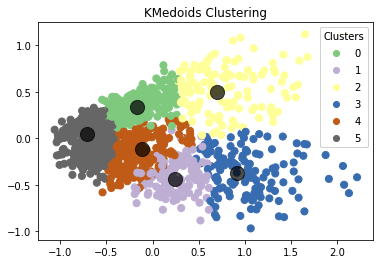

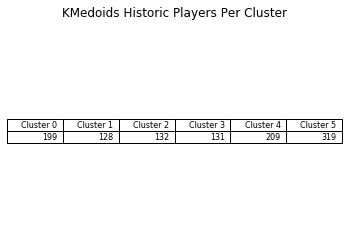

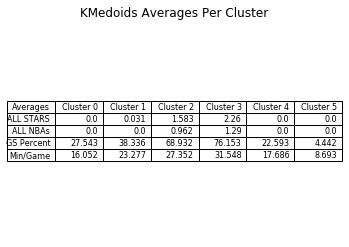

In [6]:
"""
The below clusters nba players from 1990 to 2010 into six groups with kmeans and kmedoids
Additionally, the below  displays each cluster in excel spreadsheets. and displays pypot tables.
One table describes average cluster characteristics and the other number of members per cluster.
"""
all_stars = second_yrs_1990_2010_career_pd.to_numpy()[0:,24].astype(float)
all_nbas = second_yrs_1990_2010_career_pd.to_numpy()[0:,25].astype(float)
gs_percents = second_yrs_1990_2010_career_pd.to_numpy()[0:,0].astype(float)
minutes_per_game = second_yrs_1990_2010_career_pd.to_numpy()[0:,1].astype(float)

for classifier in ['KMeans', 'KMedoids']:
	# kmeans clustering of career data into 6 clusters
	if classifier == 'KMeans':
		print('KMEANS CLUSTERING Historic Players')
		clf = KMeans(n_clusters=6, random_state=0).fit(reduced_representation_career_data)
		career_labels_kmeans = clf.labels_
	else:
		print('KMEDOIDS CLUSTERING Historic Players')
		clf = KMedoids(n_clusters=6, random_state=0).fit(reduced_representation_career_data)
		career_labels_kmedoids = clf.labels_

	career_labels = clf.labels_ # cluster labels
	career_centers = clf.cluster_centers_ # cluster centers; interesting to see which players

	# Graphing cluster assignment data points
	# using only 2 dimensions of PCA
	fig, ax = plt.subplots()
	scatter = ax.scatter(reduced_representation_career_data[:, 0], reduced_representation_career_data[:, 1], c=career_labels, s=50, cmap='Accent')
	# produce a legend with the unique colors from the scatter
	legend = ax.legend(*scatter.legend_elements(),
						loc="best", title="Clusters")
	ax.add_artist(legend)
	plt.scatter(career_centers[:, 0], career_centers[:, 1], c='black', s=200, alpha=0.7)
	plt.title(classifier + ' Clustering')
	plt.show()

	# categorical averages per cluster including: all star appearances, all nba selections, 
	# percent games started, average minutes per game, and players per cluster
	career_all_stars_averages = np.zeros(len(set(career_labels)))
	career_all_nba_averages = np.zeros(len(set(career_labels)))
	gs_percents_averages = np.zeros(len(set(career_labels)))
	minutes_per_game_averages = np.zeros(len(set(career_labels)))
	players_per_cluster = np.zeros(len(set(career_labels)))
	player_names = []
	for i in range(len(set(career_labels))):
		# indices of particular cluster
		indices = np.where(career_labels == i)[0]
		# average all star appearances per cluster
		all_stars_average = np.average(all_stars[indices])
		career_all_stars_averages[i] = all_stars_average
		# average all nba appearances per cluster
		all_nba_average = np.average(all_nbas[indices])
		career_all_nba_averages[i] = all_nba_average
		# average game start percentagers per cluster
		gs_percents_average = np.average(gs_percents[indices])
		gs_percents_averages[i] = gs_percents_average*100
		# average minutes per game per cluster
		minutes_per_game_average = np.average(minutes_per_game[indices])
		minutes_per_game_averages[i] = minutes_per_game_average
		players_per_cluster[i] = len(indices)
		# get players in each cluster
		player_names.append(player_list[indices].tolist())

	for i in range(6):
		df = pd.DataFrame(player_names[i], columns = ['Cluster ' + str(i)]) 
		df.to_csv('data/clustering_historic_players/' + classifier + 'historic_players_cluster_' + str(i) + '.csv', index=False)

	table_data=[['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], players_per_cluster.astype(int).tolist()]
	table_creator(classifier + ' Historic Players Per Cluster', table_data)

	all_star_averages = np.round(career_all_stars_averages, 3).tolist()
	all_star_averages.insert(0, 'ALL STARS')
	all_nba_averages = np.round(career_all_nba_averages, 3).tolist()
	all_nba_averages.insert(0, 'ALL NBAs')
	gs_averages = np.round(gs_percents_averages, 3).tolist()
	gs_averages.insert(0, 'GS Percent')
	min_averages = np.round(minutes_per_game_averages, 3).tolist()
	min_averages.insert(0, 'Min/Game')
	table_data=[['Averages', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], all_star_averages, all_nba_averages, gs_averages, min_averages]
	table_creator(classifier + ' Averages Per Cluster', table_data)

KMEANS CLUSTERING Current Players


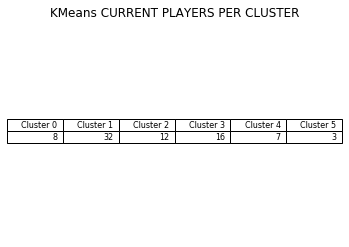

KMEDOIDS CLUSTERING Current Players


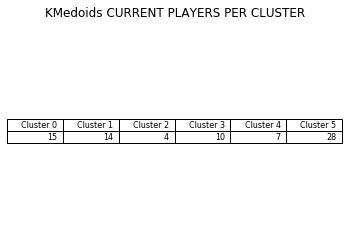

In [7]:
"""
The below clusters current nba second year players into six groups with kmeans and kmedoids
Additionally, the below  displays each cluster in excel spreadsheets and displays pypot tables.
One table describes the number of members per cluster.
"""
for classifier in ['KMeans', 'KMedoids']:
	# averages of second year performance per cluster
	#
	if classifier == 'KMeans':
		print('KMEANS CLUSTERING Current Players')
		career_labels = career_labels_kmeans
	else:
		print('KMEDOIDS CLUSTERING Current Players')
		career_labels = career_labels_kmedoids
	second_year_cluster_averages = np.zeros((len(set(career_labels)), len(second_yrs_1990_2010_season[0])))
	for i in range(len(set(career_labels))):
		indices = np.where(career_labels == i)[0]
		cluster_average = np.average(second_yrs_1990_2010_season[indices], axis=0)
		second_year_cluster_averages[i] = cluster_average


	# assign projected cluster label to current second year players
	# using euclidean distance measurement to average second year performances of 1990-2010 clusters
	distances = np.array(pairwise_distances(second_yrs_current_season, second_year_cluster_averages, metric='euclidean'))
	second_year_current_labels = np.argmin(distances, axis=1)

	players_per_cluster = np.zeros(len(set(second_year_current_labels)))
	player_names = []
	for i in range(len(set(second_year_current_labels))):
		indices = np.where(second_year_current_labels == i)[0]
		players_per_cluster[i] = len(indices)
		player_names.append(second_yrs_current_season_players_list[indices])

	table_data=[['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], players_per_cluster.astype(int).tolist()]
	table_creator(classifier + ' CURRENT PLAYERS PER CLUSTER', table_data)

	for i in range(6):
		df = pd.DataFrame(player_names[i], columns = ['Cluster ' + str(i)]) 
		df.to_csv('data/clustering_second_year_players/' + classifier + 'current_players_cluster_' + str(i) + '.csv', index=False)
